# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Bastian Bickel

Datum: 19.11.2023

Gruppe: 39

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Kann durch den Küchentischversuch "thermische Verluste (Newtonsches Abkühlungsgesetz)" das Newtonsches Abkühlungsgesetz nachgewiesen werden?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


<img src="figures/picture_231010_Beispielbild_Tasse_Auswertung.jpg" width="800">

![thermische_Verluste_Bild](figures/thermische_Verluste_Bild.jpg)

Für den Versuch wird ein heißes Getränk in einer Tasse vorbereitet. Der Sensor temperatur_cup wird in das Heißgetränk gelegt und der Sensor temperatur_enviroment bleibt auf dem Tisch liegen um die Umgebungstemperatur zu messen. Die Temperaturen des Getränks und der Umgebung werden nun für ungefähr 10 Minuten gemessen.

## Versuchsauswertung

In [3]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [4]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

import h5py
f = h5py.File('data/thermische_Verluste/thermische_Verluste.h5', 'r')

# DONE #

In [5]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.

#Temperatur dataset des warmen Getränks
temp_cup = f['RawData']['1ee7f0ee-5505-643b-995c-c8fe94d6d482']['temperature']
#Temperatur dataset der Umgebung
temp_enviroment = f['RawData']['1ee7f0ee-b9ce-6b33-a202-94164cd40a0c']['temperature']
#Zeit datasets in Sekunden 
time_cup = f['RawData']['1ee7f0ee-5505-643b-995c-c8fe94d6d482']['timestamp']
time_enviroment = f['RawData']['1ee7f0ee-b9ce-6b33-a202-94164cd40a0c']['timestamp']

# DONE #

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


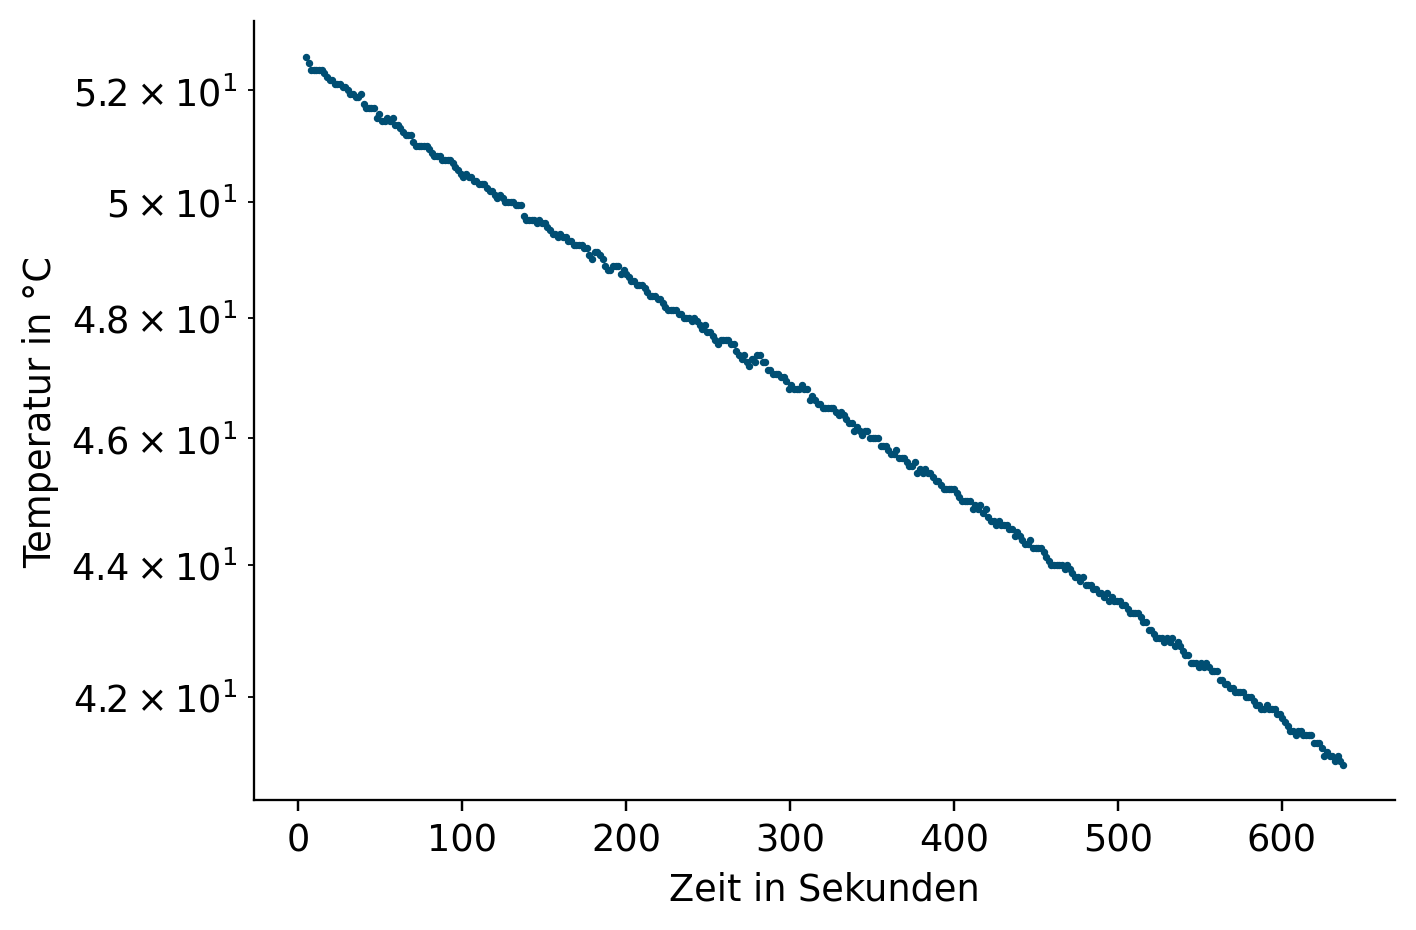

In [6]:
# TODO: Use the temperature and time data for plotting

#Erstellen eines plots mit der Zeit als x-Achsenwerte und der Differenzen der Temperaturen als y_Achsenwerte
y = np.array(list(temp_cup)) - np.array(list(temp_enviroment))
plt.scatter(time_cup, y, s = 2)

#Benennen der Achsen
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Temperatur in °C')
#y-Achse logarithmisch einstellen
plt.yscale('log')
plt.show()
# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [7]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz

#Anfangstemperatur des Getränks
T_1 = temp_cup[0]
#Durchschnittliche Temperatur der Umgebung
T_2 = sum(temp_enviroment) / len(temp_enviroment)
#Zeit
t = time_cup

K = np.polyfit(t, ((temp_cup - T_2) / (T_1 - T_2)), 1)

print("Die durchschnittliche Temperatur der Umgebung beträgt "+str(T_2)+" °C")
print("Die Anfangstemperatur des Getränks beträgt "+str(T_1)+" °C")

# DONE #

Die durchschnittliche Temperatur der Umgebung beträgt 22.72537878787879 °C
Die Anfangstemperatur des Getränks beträgt 75.3125 °C


#### (iV) Ergebnis

In [8]:
# TODO: Print result

print(K)
print("Der Koeffizient des Newtonschem Abkühlungsgesetz für den Versuch ist K = "+str(K[1]))
# DONE #

[-3.41627920e-04  9.95487973e-01]
Der Koeffizient des Newtonschem Abkühlungsgesetz für den Versuch ist K = 0.9954879725169063


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Das Newtonsche Abkühlungsgesetzt kann durch den Versuch nicht bestätigt werden, da es besagt, dass sich die Temperatur eines Körpers asymptotisch an die Umgebungstemperatur anpasst. Im erstellten plot fällt die Temperatur jedoch Linear, was womöglich die Folge der zu kurzen Messung und der zu hohen Differenz zwischen Probentemperatur und Umgebungstemperatur liegen kann.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Das Newtonsche Abkühlungsgesetzt konnte nicht bestätigt werden, da der Koeffizient näherungsweise K=1 ist und die Temperatur linear fällt. Womöglich war der Versuch nicht passend ausgeführt mit einer Starttemperatur von ca. 70°C und nur 10min Durchführungszeit. Widerlegt ist es dadurch jedoch nicht. Sehr wahrscheinlich tritt die asymptotische Annäherung erst bei einer geringeren Differenz zwischen den Temperaturen auf, welche dann das Gesetzt bestätigen würde.